  
# **STAGE 3. PRELIMINARYEXPLORATORY DATA ANALYSIS**

### Import Libraries

---

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Time series 
import datetime
import statsmodels.api as sm

### Import Data

---

In [2]:
data_path = 'D:/Data_Science_Project/7. Time series analysis/Project 1 - Analysis of power quality readings/fks_4_prepared.csv'

In [3]:
# Загрузим набор даннх для первичного визуального анализа 
fks_4 = pd.read_csv(data_path)

# Преобразование даты 
fks_4['date'] = pd.to_datetime(fks_4['date'])

# Установим время как индекс 
fks_4 = fks_4.set_index('time')

# Оценка результата 
fks_4.head(2)

date      U_fks   I_fks  CF_U  CF_I  THD_U  THD_I  \
time                                                                      
04:22:50.242000 2020-08-09  25.166698  211.92  1.59  1.56   8.86  16.19   
04:22:51.243000 2020-08-09  25.132057  216.06  1.59  1.58   9.04  15.53   

                 U_H_1  U_H_2  U_H_3  ...  I_H_32  I_H_33  I_H_34  I_H_35  \
time                                  ...                                   
04:22:50.242000  99.60   0.06   3.35  ...    0.01    0.24    0.03    0.11   
04:22:51.243000  99.58   0.07   3.37  ...    0.02    0.30    0.03    0.17   

                 I_H_36  I_H_37  I_H_38  I_H_39  I_H_40  cos_fi  
time                                                             
04:22:50.242000    0.03    0.20    0.02    0.23    0.02     0.5  
04:22:51.243000    0.03    0.22    0.03    0.26    0.02     0.5  

[2 rows x 88 columns]

In [4]:
fks_4.index

Index(['04:22:50.242000', '04:22:51.243000', '04:22:52.243000',
       '04:22:53.244000', '04:22:54.244000', '04:22:55.245000',
       '04:22:56.245000', '04:22:57.245000', '04:22:58.245000',
       '04:22:59.246000',
       ...
       '18:03:02.713000', '18:03:03.713000', '18:03:04.713000',
       '18:03:05.713000', '18:03:06.713000', '18:03:07.714000',
       '18:03:08.714000', '18:03:09.714000', '18:03:10.714000',
       '18:03:11.715000'],
      dtype='object', name='time', length=999610)

## SECTION 3.1 RESEARCH

### _Descriptive Statistics_

---

In [5]:
# Описательные статистики 
fks_4.describe()

U_fks          I_fks           CF_U           CF_I  \
count  999610.000000  999610.000000  999610.000000  999610.000000   
mean       25.154989     355.057695       1.592922       1.589280   
std         0.568020     186.710381       0.055606       0.256127   
min        21.927763       5.590000       1.420000       1.250000   
25%        24.785647     209.570000       1.550000       1.430000   
50%        25.184019     339.515000       1.590000       1.520000   
75%        25.565070     488.850000       1.630000       1.660000   
max        26.742864    1033.100000       1.970000       5.950000   

               THD_U          THD_I          U_H_1          U_H_2  \
count  999610.000000  999610.000000  999610.000000  999610.000000   
mean       13.513291      24.114234      98.997594       0.097255   
std         3.362824      10.175055       0.457452       0.063955   
min         2.800000       8.080000      96.640000       0.000000   
25%        11.150000      19.910000      98.690000       0.080000   
50%        13.500000      22.370000      99.050000       0.090000   
75%        15.950000      25.730000      99.340000       0.100000   
max        26.220000     327.670000      99.960000       5.150000   

               U_H_3          U_H_4  ...         I_H_32         I_H_33  \
count  999610.000000  999610.000000  ...  999610.000000  999610.000000   
mean        5.079288       0.067741  ...       0.044701       0.632132   
std         2.136824       0.070246  ...       0.077512       0.766369   
min         0.020000       0.000000  ...       0.000000       0.010000   
25%         3.530000       0.040000  ...       0.020000       0.260000   
50%         5.000000       0.050000  ...       0.020000       0.440000   
75%         6.520000       0.070000  ...       0.040000       0.740000   
max        14.620000       5.610000  ...       2.480000      26.940000   

              I_H_34         I_H_35         I_H_36         I_H_37  \
count  999610.000000  999610.000000  999610.000000  999610.000000   
mean        0.041484       0.475551       0.037407       0.381418   
std         0.073907       0.584720       0.066254       0.472901   
min         0.000000       0.010000       0.000000       0.000000   
25%         0.010000       0.190000       0.010000       0.150000   
50%         0.020000       0.320000       0.020000       0.260000   
75%         0.040000       0.550000       0.040000       0.440000   
max         2.820000      19.700000       2.800000      18.220000   

              I_H_38         I_H_39         I_H_40         cos_fi  
count  999610.000000  999610.000000  999610.000000  999610.000000  
mean        0.034371       0.320629       0.032363       0.466016  
std         0.061074       0.406142       0.057090       0.268532  
min         0.000000       0.000000       0.000000      -1.000000  
25%         0.010000       0.130000       0.010000       0.420000  
50%         0.020000       0.220000       0.020000       0.550000  
75%         0.030000       0.370000       0.030000       0.620000  
max         2.290000      14.460000       2.070000       1.000000  

[8 rows x 87 columns]

### _Distribution of data_

---

In [6]:
def distribution(data_for_eda):
    
    fig, ax = plt.subplots(1,3, figsize=(25, 5))
    fig.subplots_adjust(wspace=0.15)
    plt.suptitle("Распределение переменной", fontsize=18)
    
    sns.set_style("whitegrid")
    sns.histplot(data = data_for_eda, bins = 80, stat = 'density', kde = True, ax=ax[0])
    sns.boxenplot(data = data_for_eda, ax=ax[1])
    sns.ecdfplot(data = data_for_eda, ax=ax[2])
    
    fig, ax = plt.subplots(1,1, figsize=(25, 5))
    data_for_eda.plot()
    print("Описательные статистики:\n{}\n".format(data_for_eda.describe().round(2)) + '_' * 100+ '\n')
    print("Смещение:\n{}\n".format(data_for_eda.skew().round(2))+ '_' * 100+ '\n')
    print("Эксцесс:\n{}\n".format(data_for_eda.kurt().round(2)) + '_' * 100+ '\n')

#### Напряжение

Описательные статистики:
count    999610.00
mean         25.15
std           0.57
min          21.93
25%          24.79
50%          25.18
75%          25.57
max          26.74
Name: U_fks, dtype: float64
____________________________________________________________________________________________________

Смещение:
-0.42
____________________________________________________________________________________________________

Эксцесс:
0.39
____________________________________________________________________________________________________



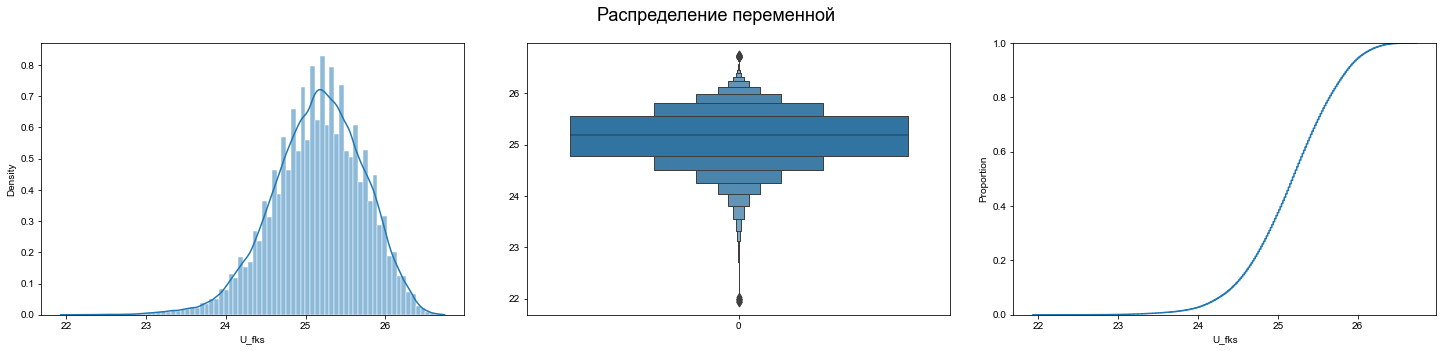

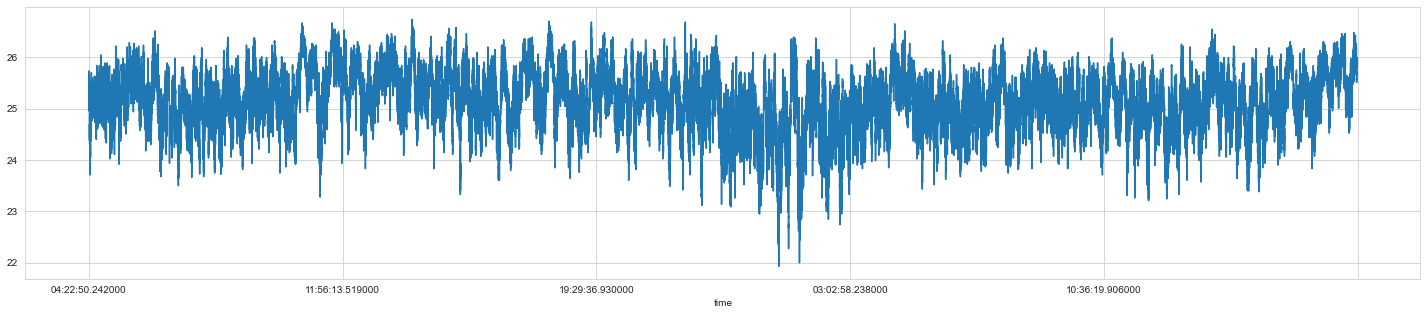

In [7]:
# Оценка распределения данных
distribution(fks_4['U_fks'])

#### Ток

Описательные статистики:
count    999610.00
mean        355.06
std         186.71
min           5.59
25%         209.57
50%         339.52
75%         488.85
max        1033.10
Name: I_fks, dtype: float64
____________________________________________________________________________________________________

Смещение:
0.33
____________________________________________________________________________________________________

Эксцесс:
-0.52
____________________________________________________________________________________________________



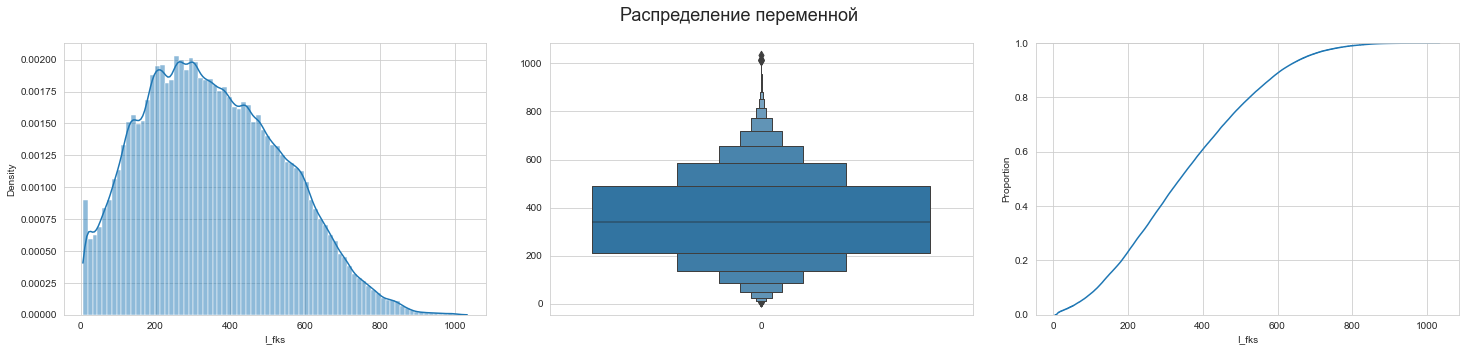

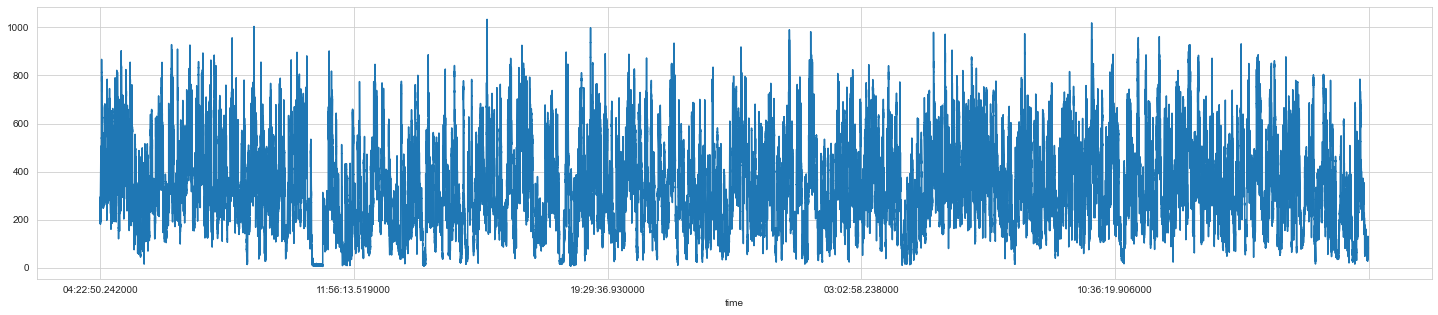

In [8]:
# Оценка распределения данных
distribution(fks_4['I_fks'])

#### Коэффициент пиковых значений напряжения

Описательные статистики:
count    999610.00
mean          1.59
std           0.06
min           1.42
25%           1.55
50%           1.59
75%           1.63
max           1.97
Name: CF_U, dtype: float64
____________________________________________________________________________________________________

Смещение:
0.63
____________________________________________________________________________________________________

Эксцесс:
0.9
____________________________________________________________________________________________________



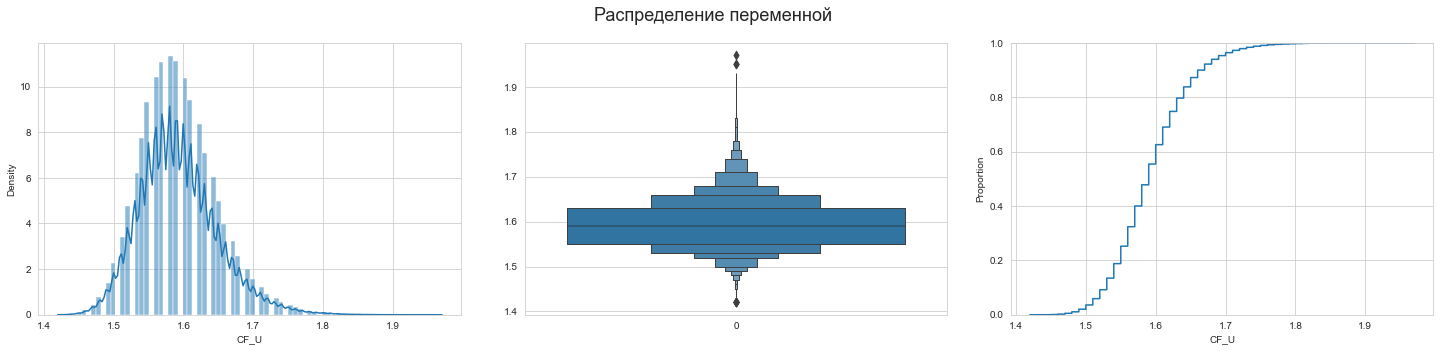

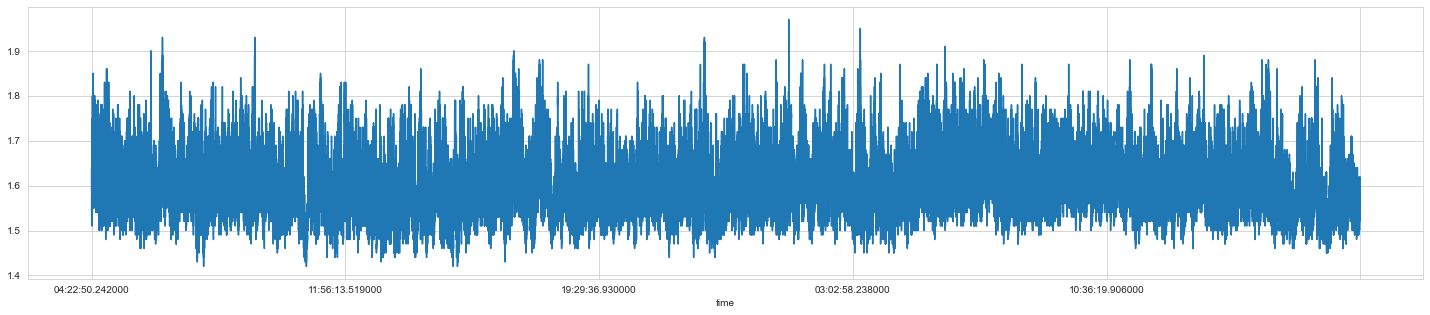

In [9]:
# Оценка распределения данных
distribution(fks_4['CF_U'])

#### Коэффициент пиковых значений тока

Описательные статистики:
count    999610.00
mean          1.59
std           0.26
min           1.25
25%           1.43
50%           1.52
75%           1.66
max           5.95
Name: CF_I, dtype: float64
____________________________________________________________________________________________________

Смещение:
2.89
____________________________________________________________________________________________________

Эксцесс:
12.23
____________________________________________________________________________________________________



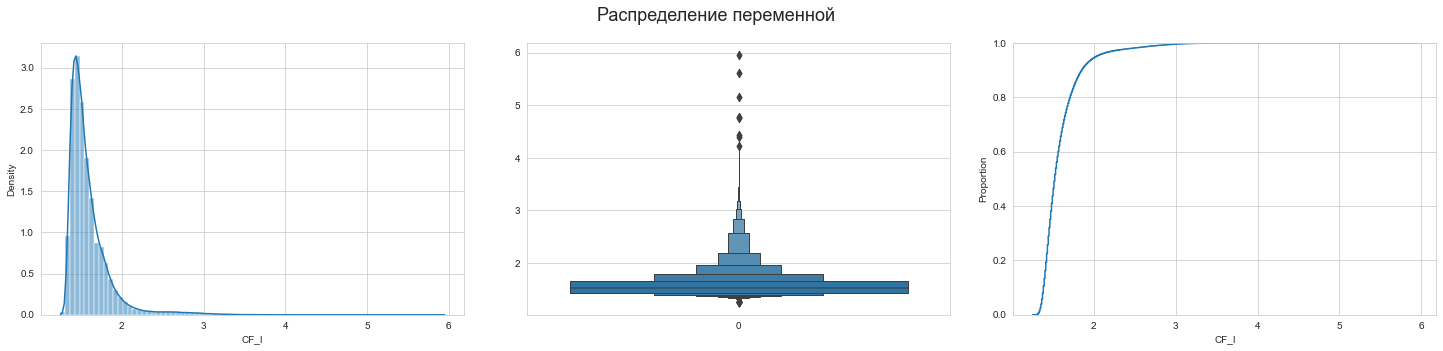

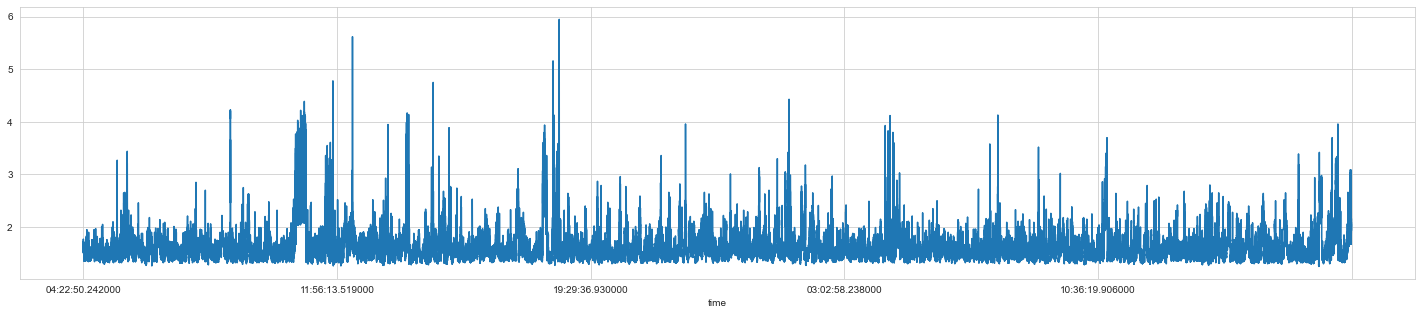

In [10]:
# Оценка распределения данных
distribution(fks_4['CF_I'])

#### Коэффициент гармонических искажений напряжения

Описательные статистики:
count    999610.00
mean         13.51
std           3.36
min           2.80
25%          11.15
50%          13.50
75%          15.95
max          26.22
Name: THD_U, dtype: float64
____________________________________________________________________________________________________

Смещение:
-0.03
____________________________________________________________________________________________________

Эксцесс:
-0.39
____________________________________________________________________________________________________



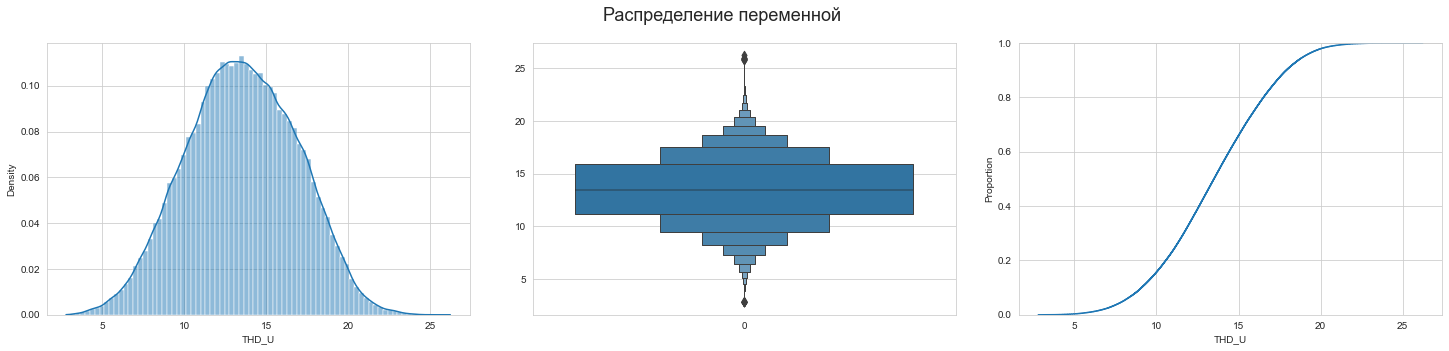

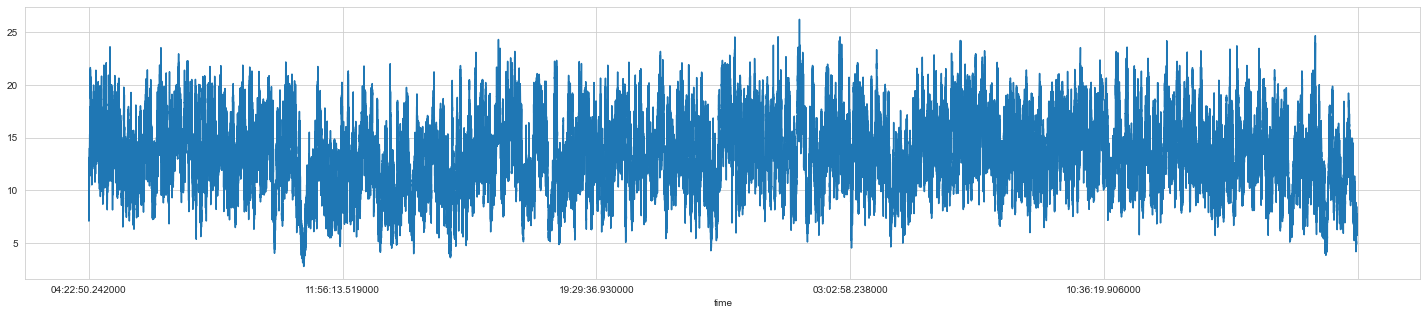

In [11]:
# Оценка распределения данных
distribution(fks_4['THD_U'])

#### Коэффициент гармонических искажений тока

Описательные статистики:
count    999610.00
mean         24.11
std          10.18
min           8.08
25%          19.91
50%          22.37
75%          25.73
max         327.67
Name: THD_I, dtype: float64
____________________________________________________________________________________________________

Смещение:
10.94
____________________________________________________________________________________________________

Эксцесс:
208.23
____________________________________________________________________________________________________



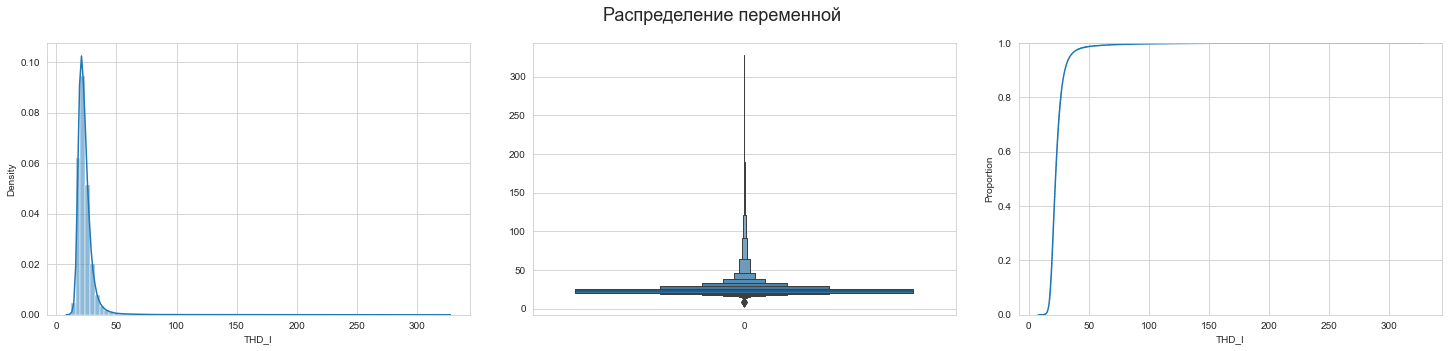

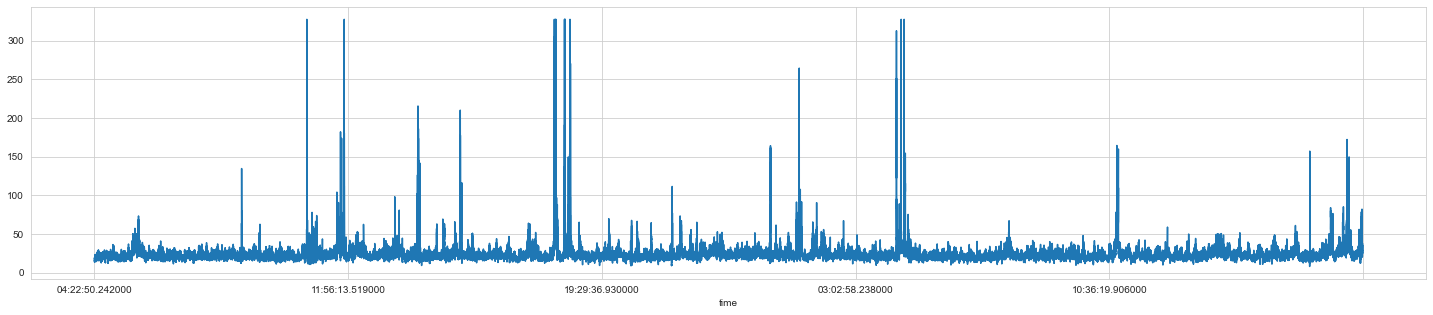

In [12]:
# Оценка распределения данных
distribution(fks_4['THD_I'])

#### Косинус угла сдвига фаз

Описательные статистики:
count    999610.00
mean          0.47
std           0.27
min          -1.00
25%           0.42
50%           0.55
75%           0.62
max           1.00
Name: cos_fi, dtype: float64
____________________________________________________________________________________________________

Смещение:
-2.23
____________________________________________________________________________________________________

Эксцесс:
5.91
____________________________________________________________________________________________________



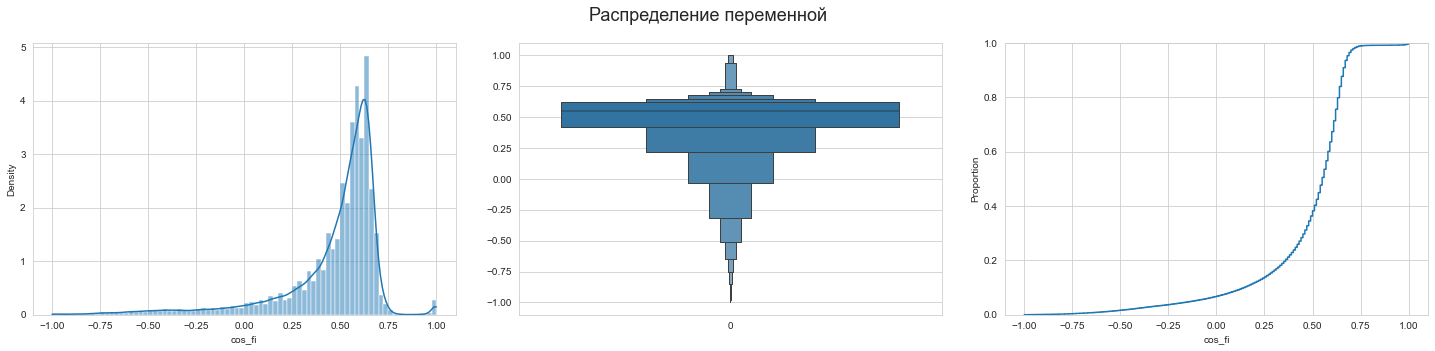

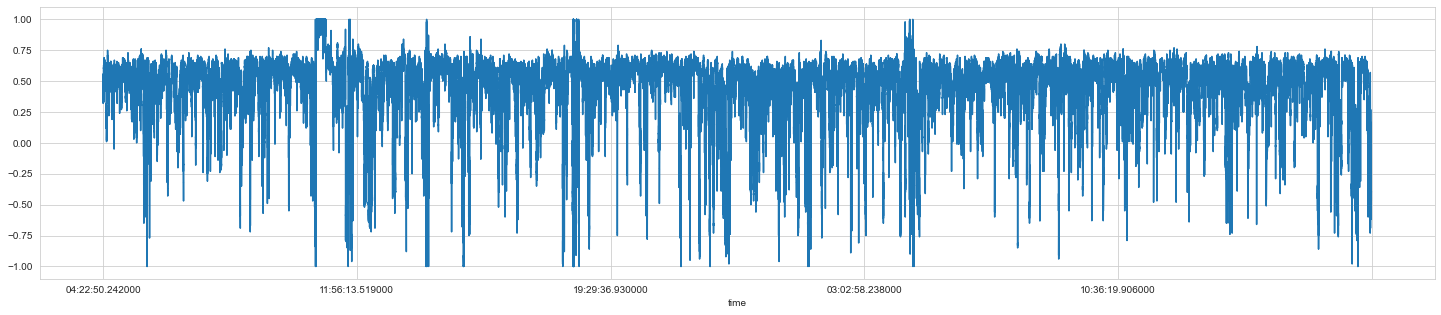

In [13]:
# Оценка распределения данных
distribution(fks_4['cos_fi'])

In [14]:
# Список переменных
fks_4.columns.tolist()

['date',
 'U_fks',
 'I_fks',
 'CF_U',
 'CF_I',
 'THD_U',
 'THD_I',
 'U_H_1',
 'U_H_2',
 'U_H_3',
 'U_H_4',
 'U_H_5',
 'U_H_6',
 'U_H_7',
 'U_H_8',
 'U_H_9',
 'U_H_10',
 'U_H_11',
 'U_H_12',
 'U_H_13',
 'U_H_14',
 'U_H_15',
 'U_H_16',
 'U_H_17',
 'U_H_18',
 'U_H_19',
 'U_H_20',
 'U_H_21',
 'U_H_22',
 'U_H_23',
 'U_H_24',
 'U_H_25',
 'U_H_26',
 'U_H_27',
 'U_H_28',
 'U_H_29',
 'U_H_30',
 'U_H_31',
 'U_H_32',
 'U_H_33',
 'U_H_34',
 'U_H_35',
 'U_H_36',
 'U_H_37',
 'U_H_38',
 'U_H_39',
 'U_H_40',
 'I_H_1',
 'I_H_2',
 'I_H_3',
 'I_H_4',
 'I_H_5',
 'I_H_6',
 'I_H_7',
 'I_H_8',
 'I_H_9',
 'I_H_10',
 'I_H_11',
 'I_H_12',
 'I_H_13',
 'I_H_14',
 'I_H_15',
 'I_H_16',
 'I_H_17',
 'I_H_18',
 'I_H_19',
 'I_H_20',
 'I_H_21',
 'I_H_22',
 'I_H_23',
 'I_H_24',
 'I_H_25',
 'I_H_26',
 'I_H_27',
 'I_H_28',
 'I_H_29',
 'I_H_30',
 'I_H_31',
 'I_H_32',
 'I_H_33',
 'I_H_34',
 'I_H_35',
 'I_H_36',
 'I_H_37',
 'I_H_38',
 'I_H_39',
 'I_H_40',
 'cos_fi']

#### Амплитуды гармоник напряжения

In [15]:
fks_4_U_H = fks_4[['U_H_1',
 'U_H_2',
 'U_H_3',
 'U_H_4',
 'U_H_5',
 'U_H_6',
 'U_H_7',
 'U_H_8',
 'U_H_9',
 'U_H_10',
 'U_H_11',
 'U_H_12',
 'U_H_13',
 'U_H_14',
 'U_H_15',
 'U_H_16',
 'U_H_17',
 'U_H_18',
 'U_H_19',
 'U_H_20',
 'U_H_21',
 'U_H_22',
 'U_H_23',
 'U_H_24',
 'U_H_25',
 'U_H_26',
 'U_H_27',
 'U_H_28',
 'U_H_29',
 'U_H_30',
 'U_H_31',
 'U_H_32',
 'U_H_33',
 'U_H_34',
 'U_H_35',
 'U_H_36',
 'U_H_37',
 'U_H_38',
 'U_H_39',
 'U_H_40']]

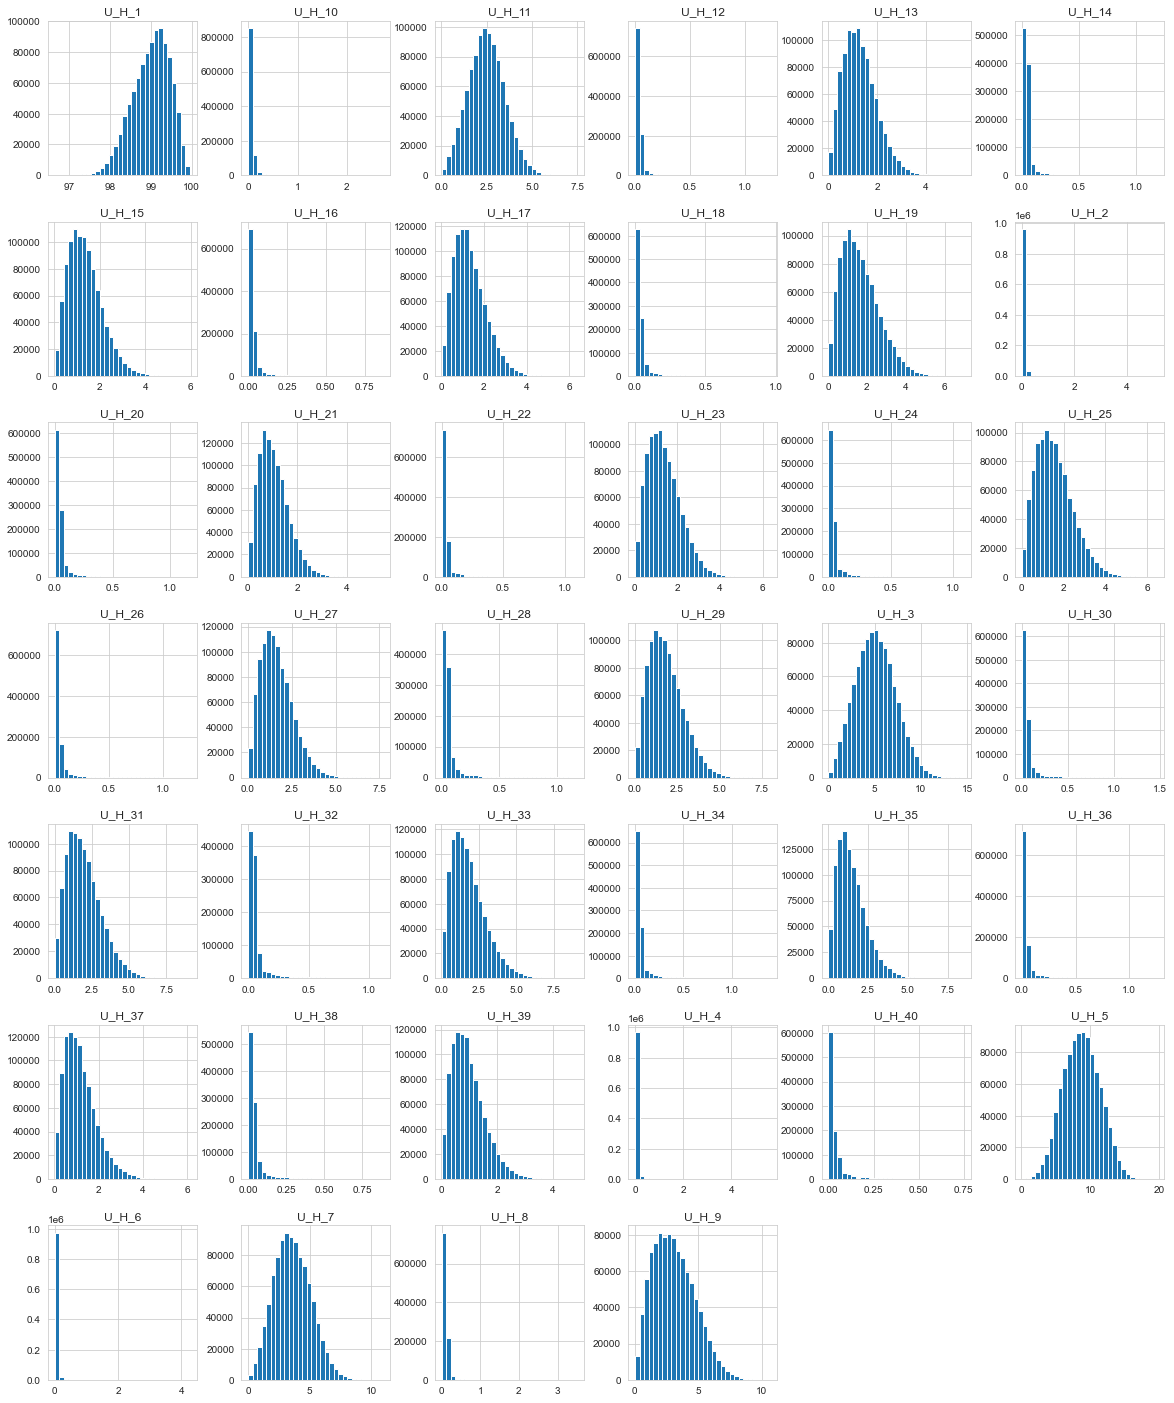

In [16]:
fks_4_U_H.hist(bins=30, figsize=(20,25))
plt.show()

#### Амплитуды гармоник тока

In [17]:
fks_4_I_H = fks_4[['I_H_1',
 'I_H_2',
 'I_H_3',
 'I_H_4',
 'I_H_5',
 'I_H_6',
 'I_H_7',
 'I_H_8',
 'I_H_9',
 'I_H_10',
 'I_H_11',
 'I_H_12',
 'I_H_13',
 'I_H_14',
 'I_H_15',
 'I_H_16',
 'I_H_17',
 'I_H_18',
 'I_H_19',
 'I_H_20',
 'I_H_21',
 'I_H_22',
 'I_H_23',
 'I_H_24',
 'I_H_25',
 'I_H_26',
 'I_H_27',
 'I_H_28',
 'I_H_29',
 'I_H_30',
 'I_H_31',
 'I_H_32',
 'I_H_33',
 'I_H_34',
 'I_H_35',
 'I_H_36',
 'I_H_37',
 'I_H_38',
 'I_H_39',
 'I_H_40']]

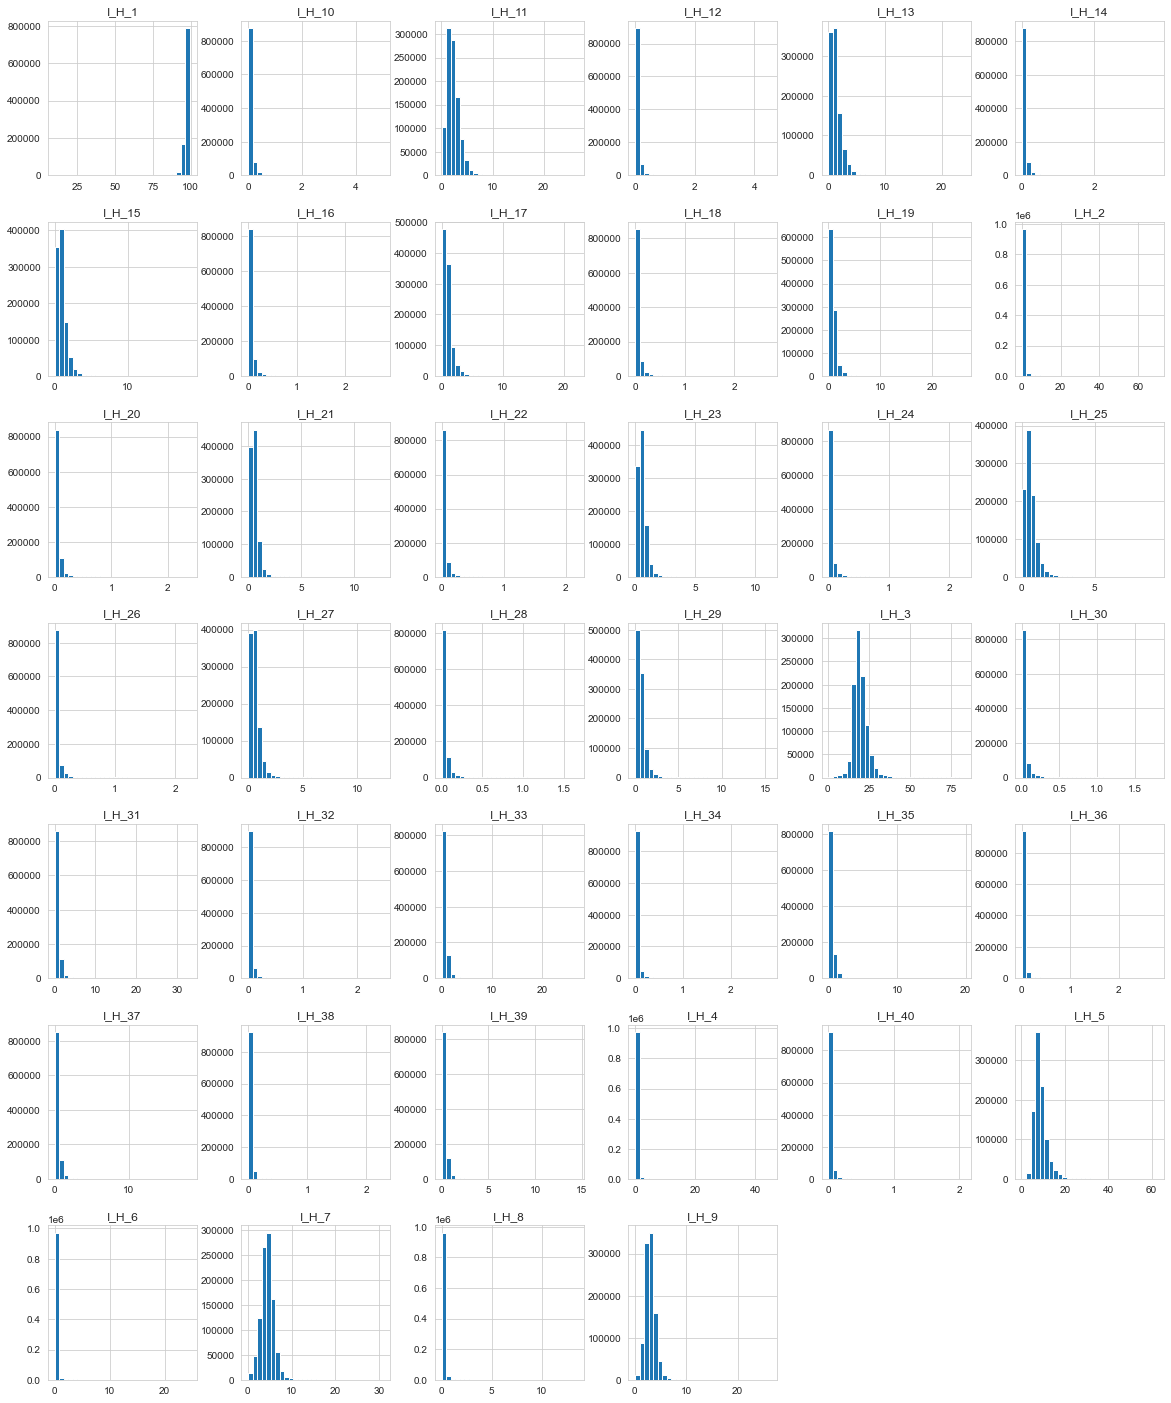

In [18]:
fks_4_I_H.hist(bins=30, figsize=(20,25))
plt.show()

С точки зрения работы НДЗ ФКС на так же интресуют величины контролируемые защитой, а именно сопротивление измереяемое защитой и угол этого совпротивления. Расчитаем необходимые величины и сделаем анализ их распеределения

#### Сопротивление нагрузки

In [19]:
# Расчет сопротивления нагрузки
fks_4['Z_fks'] = (fks_4['U_fks']*1000) / fks_4['I_fks']

Описательные статистики:
count    999610.00
mean        135.28
std         259.60
min          22.41
25%          50.90
50%          74.06
75%         121.31
max        4557.87
Name: Z_fks, dtype: float64
____________________________________________________________________________________________________

Смещение:
7.03
____________________________________________________________________________________________________

Эксцесс:
58.52
____________________________________________________________________________________________________



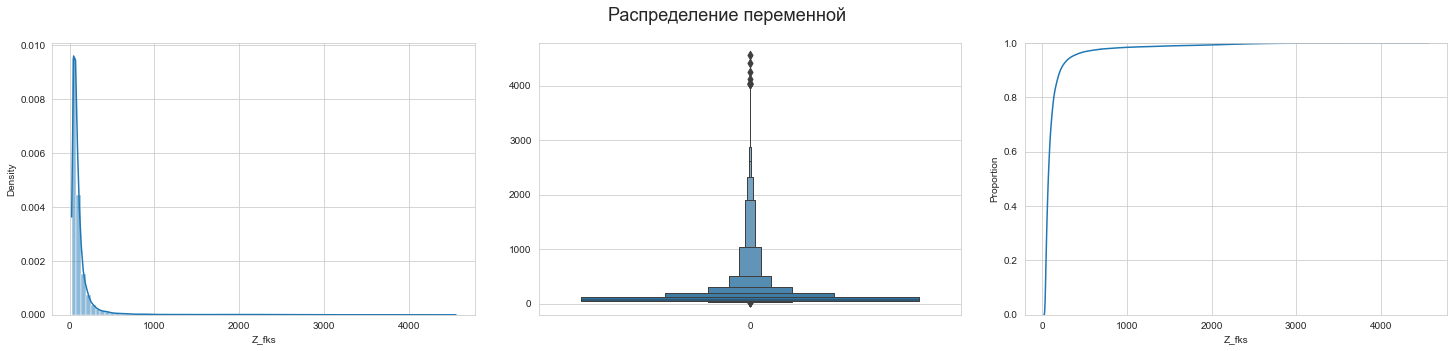

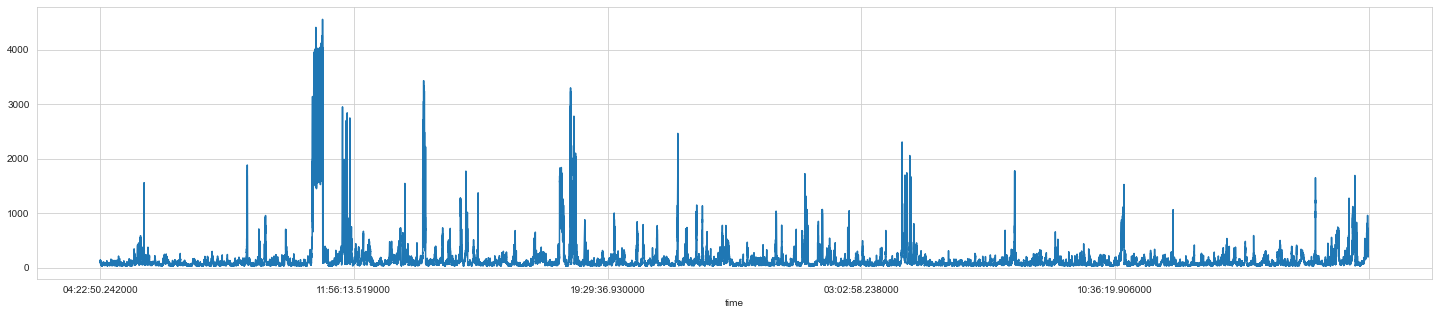

In [20]:
# Оценка распределения данных
distribution(fks_4['Z_fks'])

#### Угол сопротивление нагрузки (через Z_fks)

In [21]:
# Расчет угла сопротивления нагрузки
fks_4['fi_Z'] = np.degrees(np.arctan(fks_4['Z_fks']))

Описательные статистики:
count    999610.00
mean         89.18
std           0.44
min          87.44
25%          88.87
50%          89.23
75%          89.53
max          89.99
Name: fi_Z, dtype: float64
____________________________________________________________________________________________________

Смещение:
-0.39
____________________________________________________________________________________________________

Эксцесс:
-0.42
____________________________________________________________________________________________________



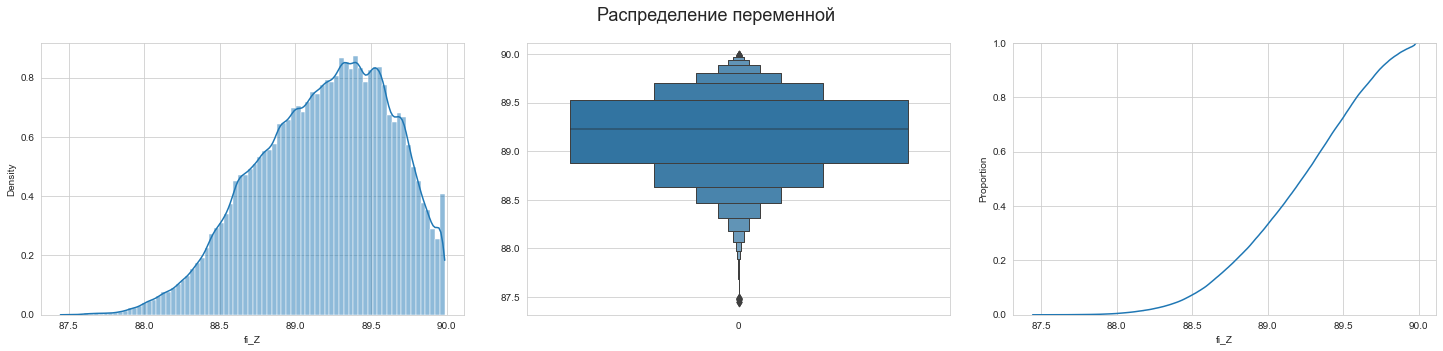

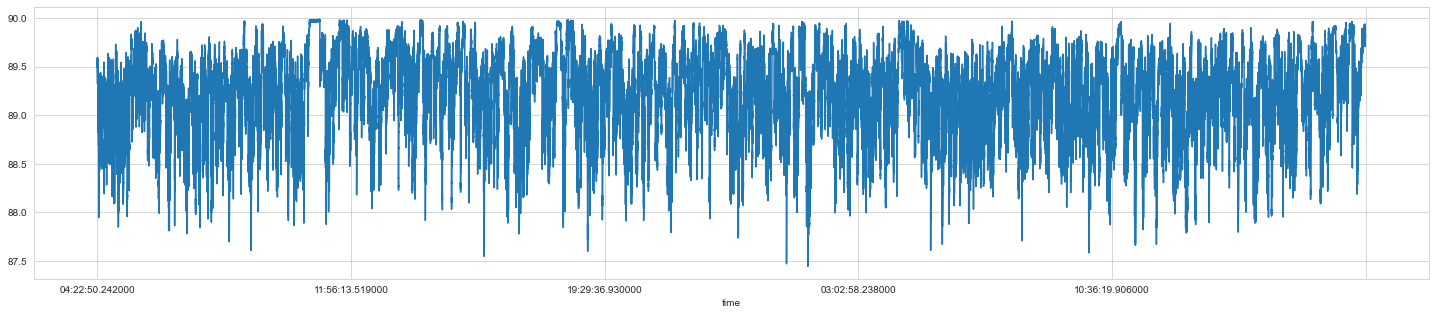

In [22]:
distribution(fks_4['fi_Z'])

#### Угол сопротивление нагрузки (через cos_fi)

In [23]:
# Расчет угла между током и напряжением 
fks_4['fi'] = np.degrees(np.arccos(fks_4['cos_fi']))

Описательные статистики:
count    999610.00
mean         61.34
std          17.35
min           0.00
25%          51.68
50%          56.63
75%          65.17
max         180.00
Name: fi, dtype: float64
____________________________________________________________________________________________________

Смещение:
1.83
____________________________________________________________________________________________________

Эксцесс:
6.32
____________________________________________________________________________________________________



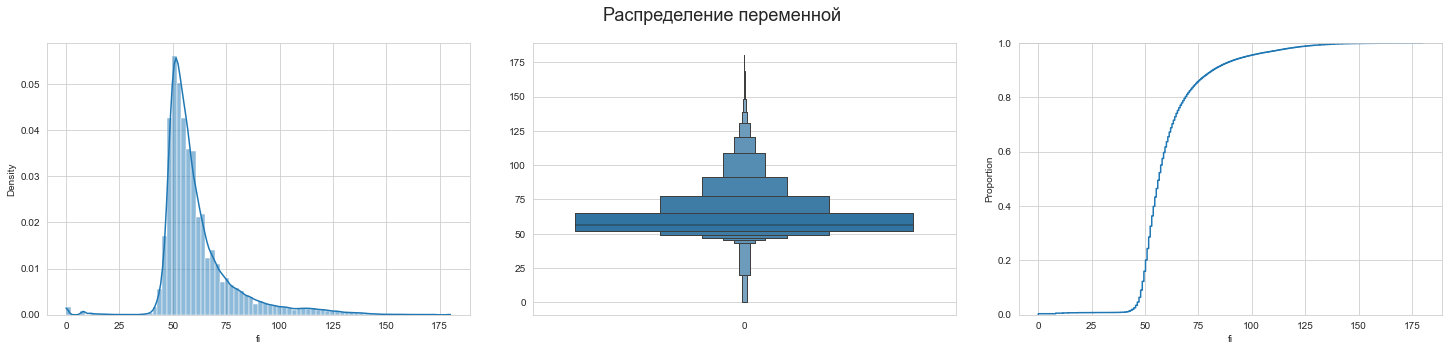

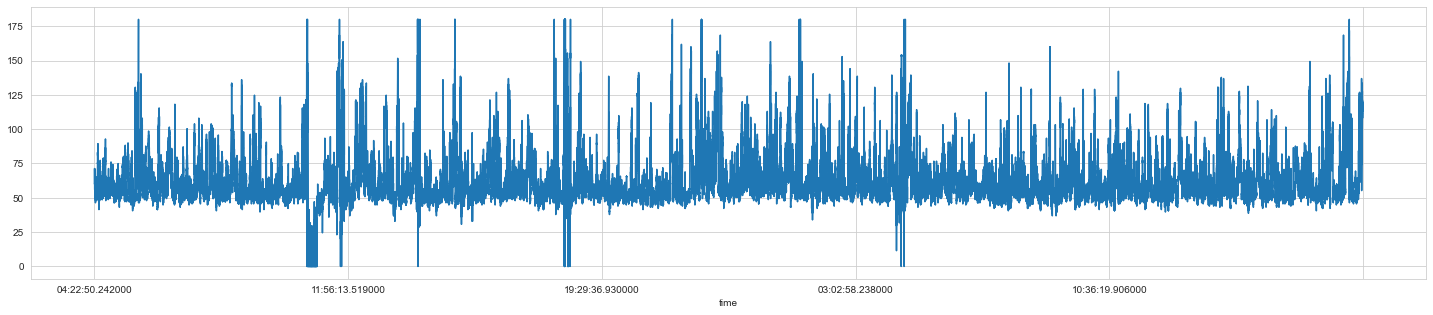

In [24]:
# Оценка распределения данных
distribution(fks_4['fi'])

### _Exploring Relationships_

---

In [25]:
# Размер изображения 
sns.set(rc={'figure.figsize':(10,10)})

#### U_fks | I_fks

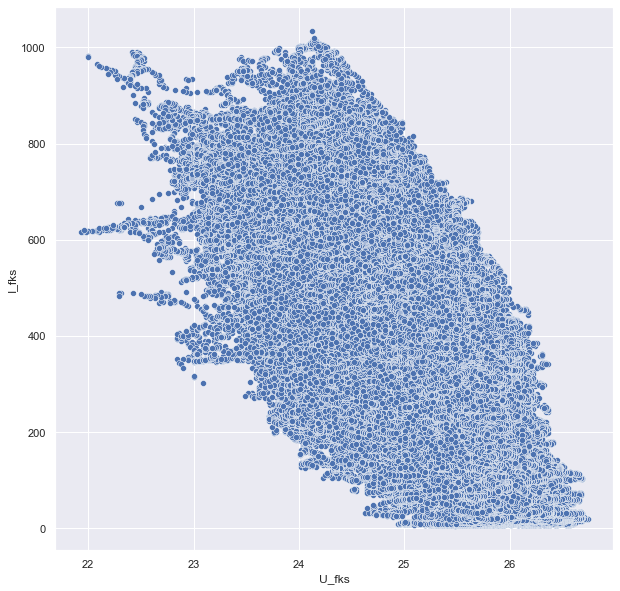

In [26]:
sns.scatterplot(data = fks_4, x="U_fks", y="I_fks")

#### CF_U | CF_I

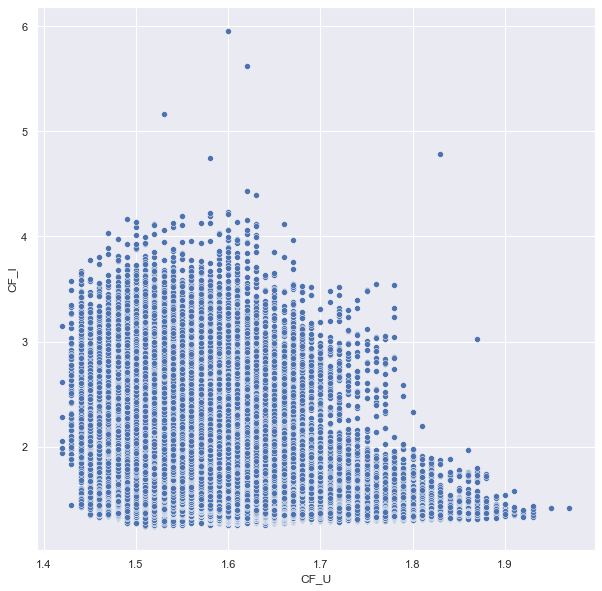

In [27]:
sns.scatterplot(data = fks_4, x="CF_U", y="CF_I")

#### THD_U | THD_I

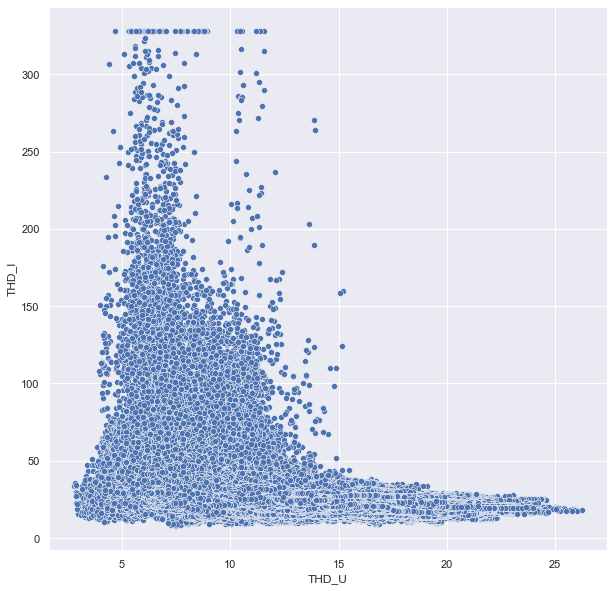

In [28]:
sns.scatterplot(data = fks_4, x="THD_U", y="THD_I")

#### U_fks | cos_fi

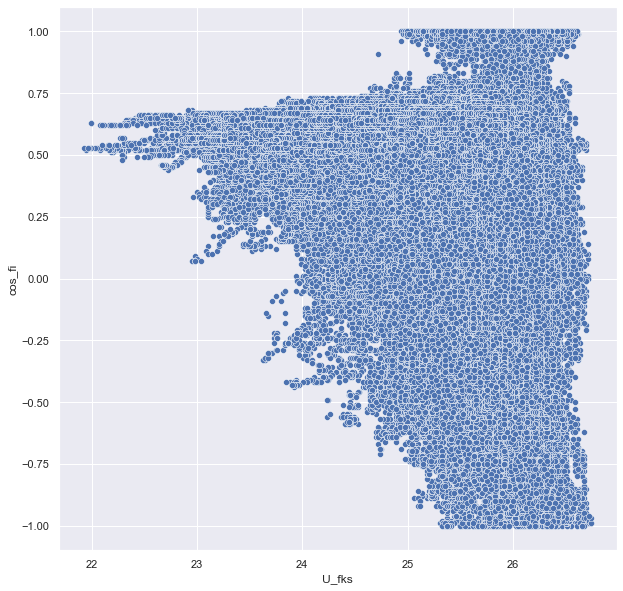

In [29]:
sns.scatterplot(data = fks_4, x="U_fks", y="cos_fi")

#### I_fks | cos_fi

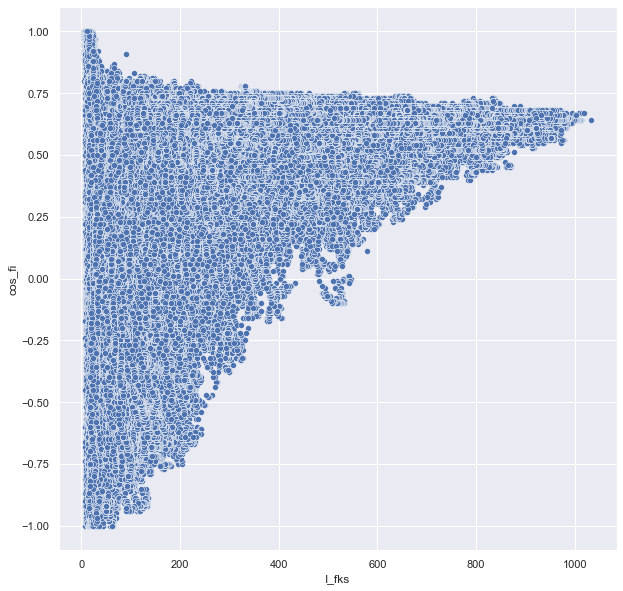

In [30]:
sns.scatterplot(data = fks_4, x="I_fks", y="cos_fi")

#### Z_fks | I_fks

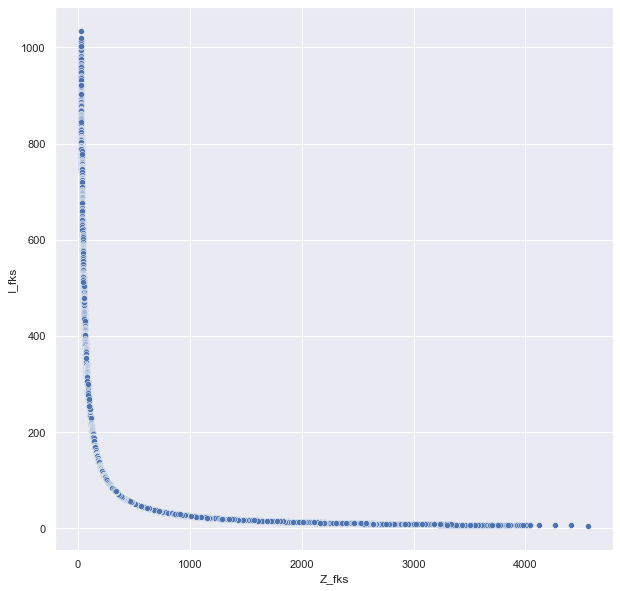

In [31]:
sns.scatterplot(data = fks_4, x="Z_fks", y="I_fks")

#### Z_fks | U_fks

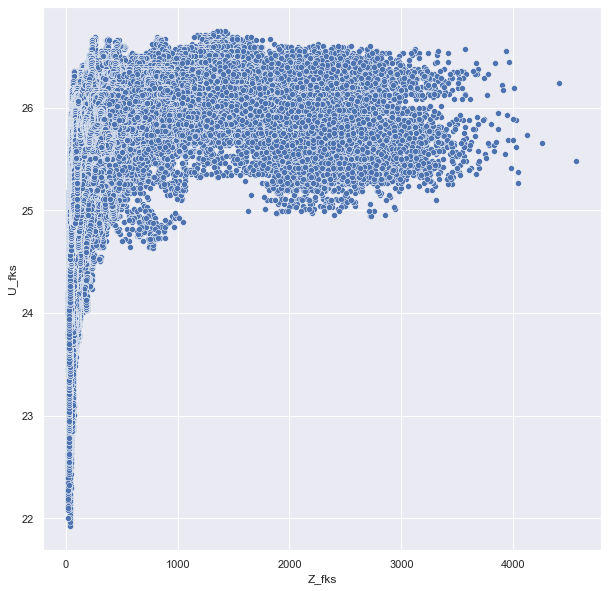

In [32]:
sns.scatterplot(data = fks_4, x="Z_fks", y="U_fks")

#### Z_fks | cos_fi

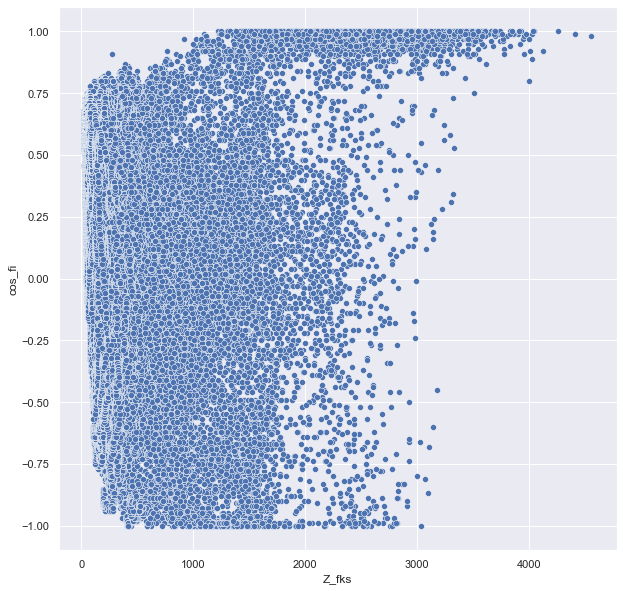

In [33]:
sns.scatterplot(data = fks_4, x="Z_fks", y="cos_fi")

#### Z_fks | fi_Z

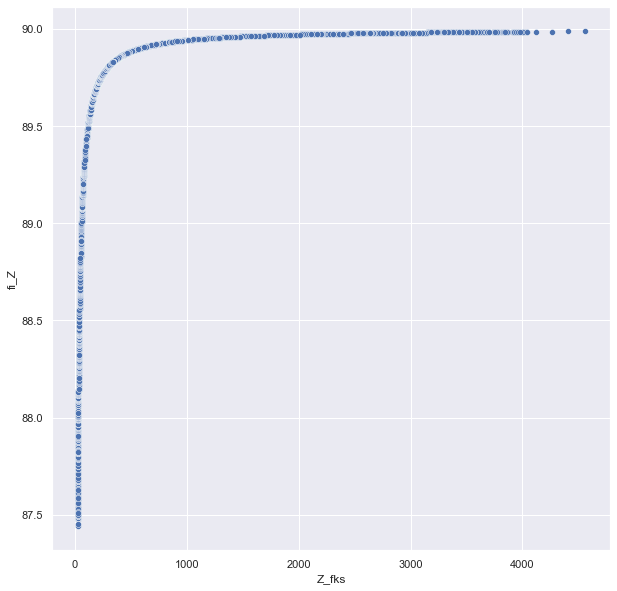

In [34]:
sns.scatterplot(data = fks_4, x="Z_fks", y="fi_Z")

#### Z_fks | fi

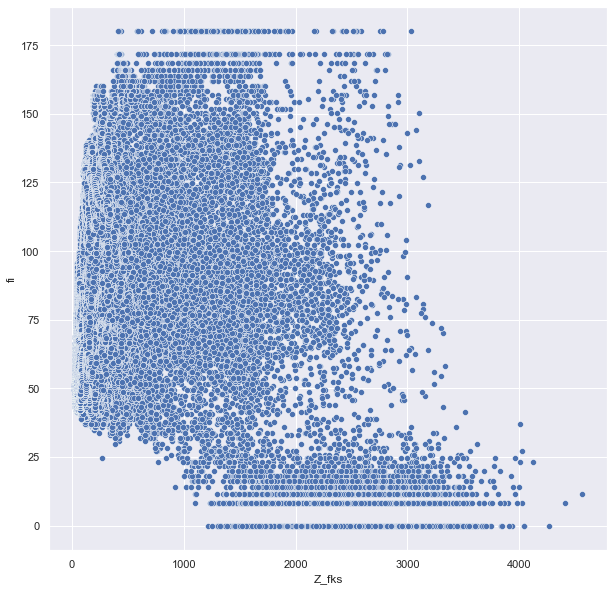

In [35]:
sns.scatterplot(data = fks_4, x="Z_fks", y="fi")

#### Z_fks | CF_I

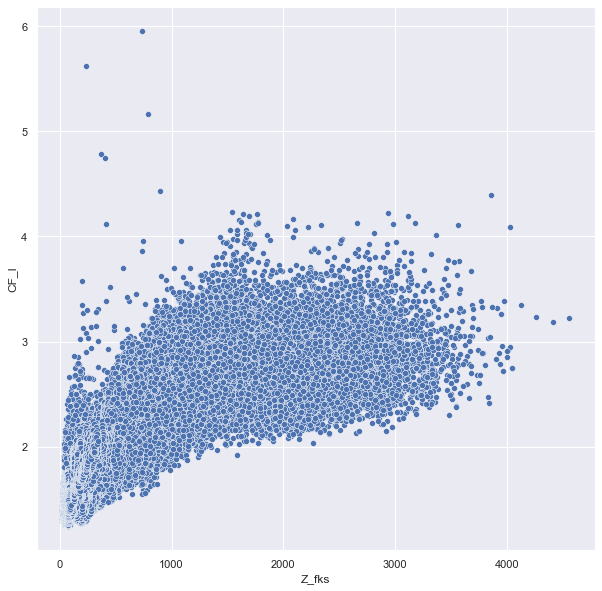

In [36]:
sns.scatterplot(data = fks_4, x="Z_fks", y="CF_I")

#### Z_fks | CF_U

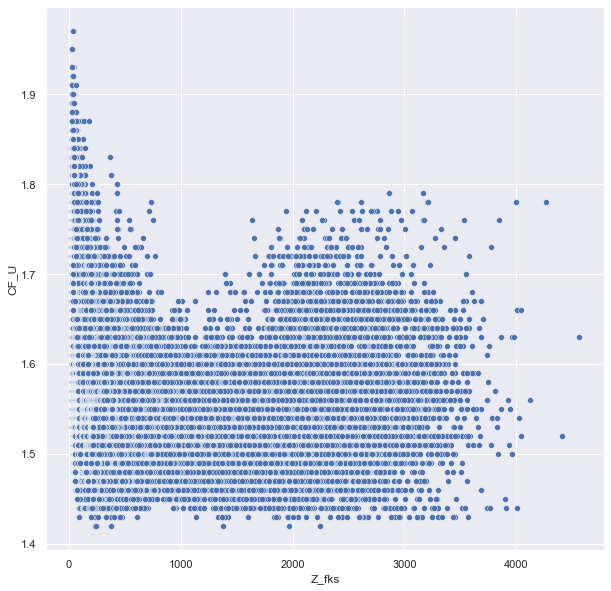

In [37]:
sns.scatterplot(data = fks_4, x="Z_fks", y="CF_U")

#### Z_fks | THD_I

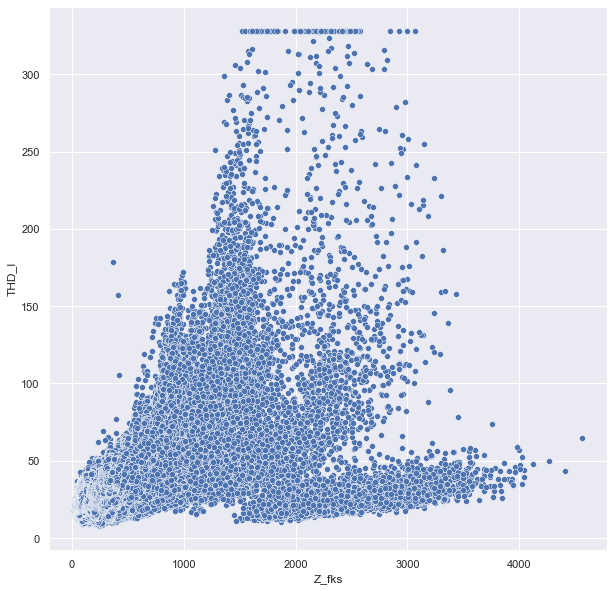

In [38]:
sns.scatterplot(data = fks_4, x="Z_fks", y="THD_I")

#### Z_fks | THD_U

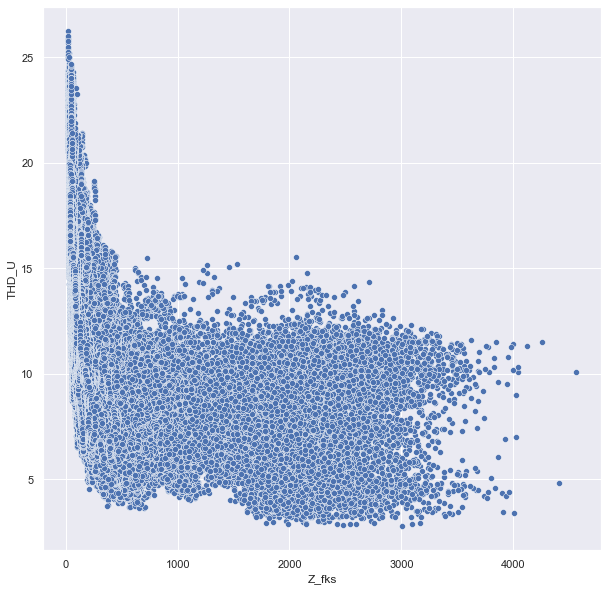

In [39]:
sns.scatterplot(data = fks_4, x="Z_fks", y="THD_U")

### _Correlation analysis_

---

In [40]:
# Отбор переменных для корриляционного анализа
fks_4_cor = fks_4[['U_fks',
 'I_fks',
 'CF_U',
 'CF_I',
 'THD_U',
 'THD_I',
 'cos_fi',
 'Z_fks',
 'fi_Z',
 'fi']]

In [41]:
# Проверка результата 
fks_4_cor.head()

U_fks   I_fks  CF_U  CF_I  THD_U  THD_I  cos_fi  \
time                                                                   
04:22:50.242000  25.166698  211.92  1.59  1.56   8.86  16.19    0.50   
04:22:51.243000  25.132057  216.06  1.59  1.58   9.04  15.53    0.50   
04:22:52.243000  25.114737  217.02  1.59  1.56   9.13  15.46    0.50   
04:22:53.244000  25.114737  215.73  1.59  1.55   9.11  15.56    0.50   
04:22:54.244000  25.097416  213.97  1.60  1.57   9.10  15.94    0.49   

                      Z_fks       fi_Z         fi  
time                                               
04:22:50.242000  118.755654  89.517544  60.000000  
04:22:51.243000  116.319806  89.507441  60.000000  
04:22:52.243000  115.725448  89.504911  60.000000  
04:22:53.244000  116.417451  89.507854  60.000000  
04:22:54.244000  117.294089  89.511532  60.659418

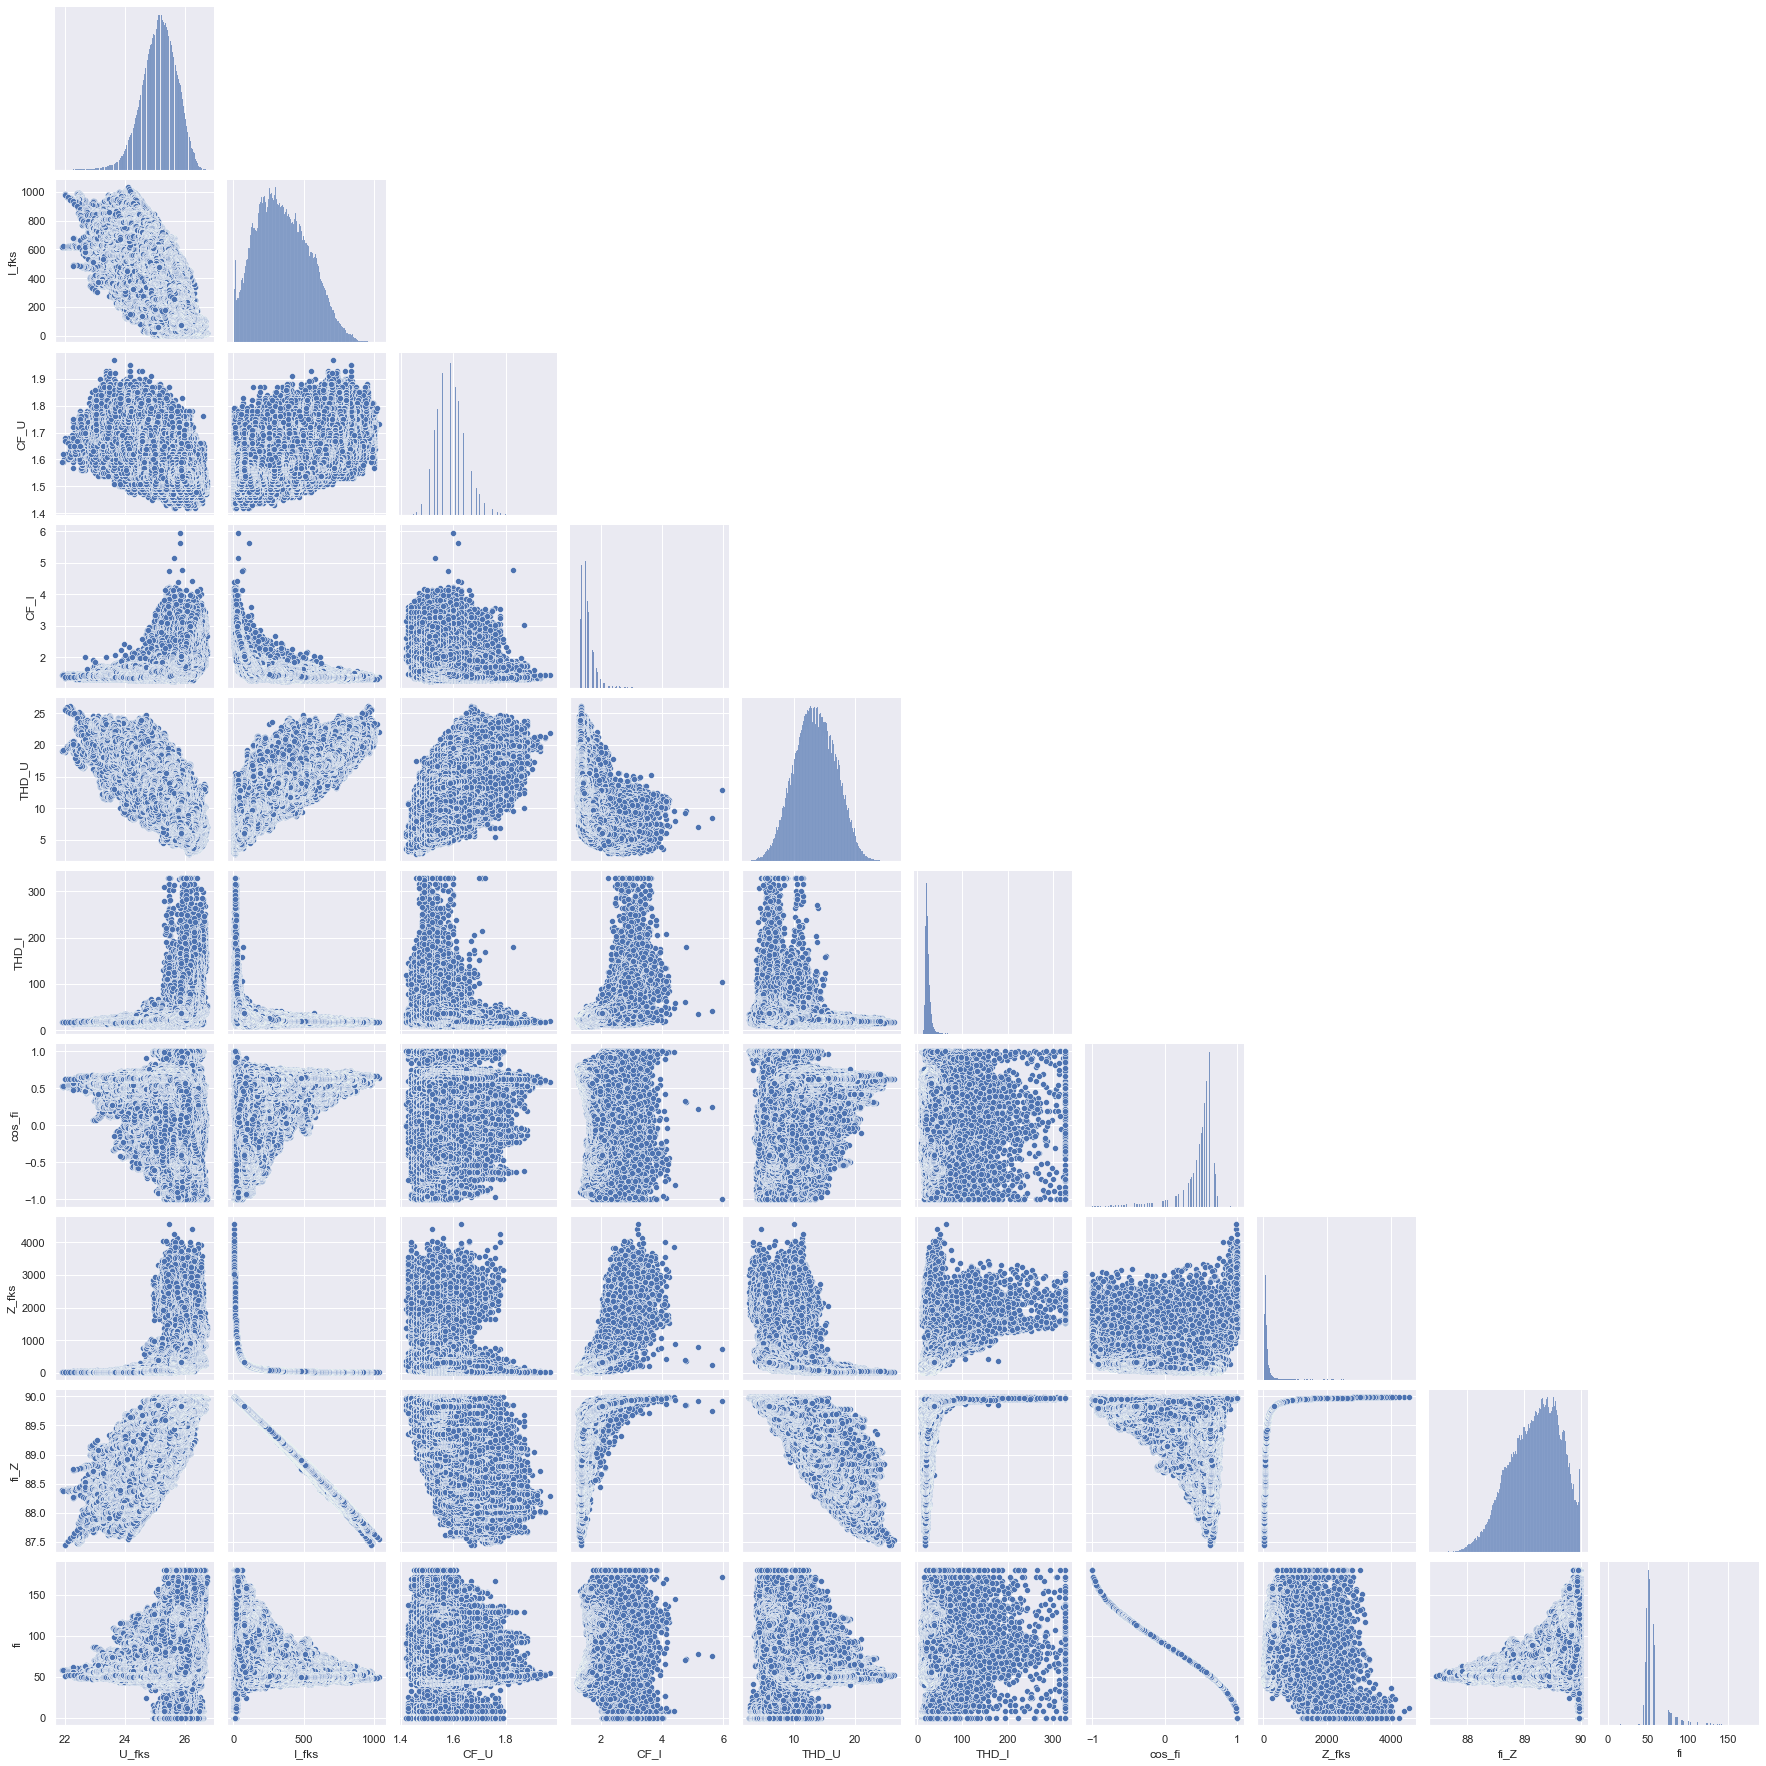

In [42]:
# Построение корриляционной матрицы
sns.pairplot(data = fks_4_cor, corner=True)

# from pandas.plotting import scatter_matrix
# scatter_matrix(fks_4_cor, alpha=0.2)
# plt.show()

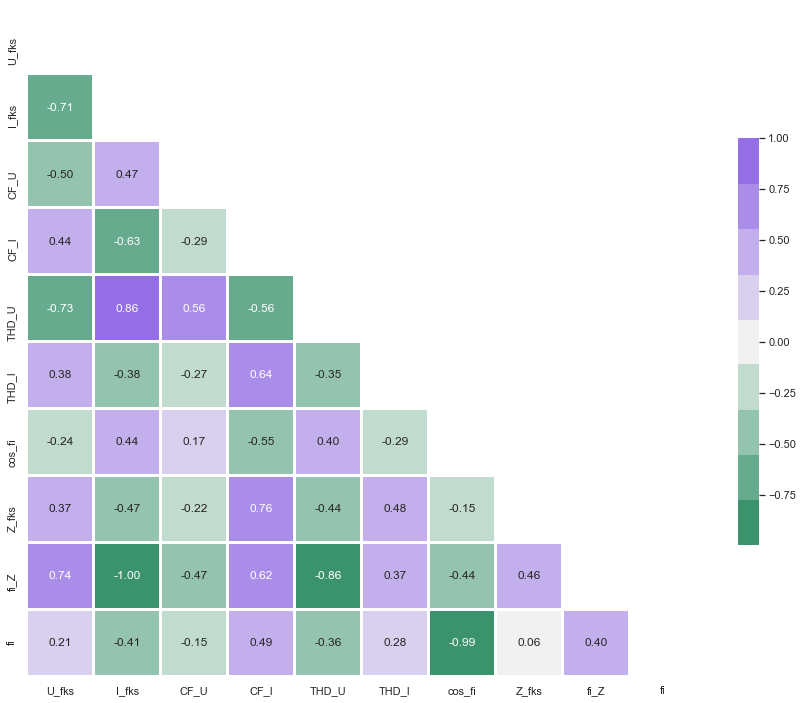

In [43]:
# Постороение диагональной корриляционной матрицы.

sns.set_theme(style="white")

# Compute the correlation matrix
corr = fks_4_cor.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, )

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=2, cbar_kws={"shrink": .5})

### _Time Series Analysis_

---

### _Outliers detection_

---

### _Grouping Datasets_

---


## SECTION 3.2 CONCLUSIONS